### importing necessery libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading csv file

In [6]:
data = pd.read_csv("/content/train_loan (1).csv")

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
data.shape

(614, 13)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Check for numerical data

In [11]:
numerical_columns = list(data._get_numeric_data().columns)
print(numerical_columns)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


### Handling null values

In [12]:
data[numerical_columns].isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [13]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Data visualisation

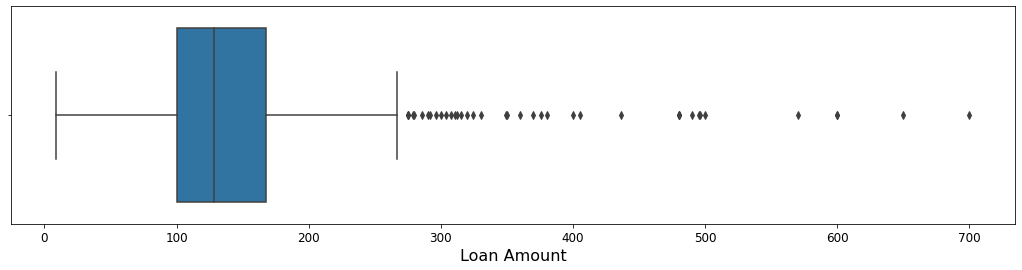

In [14]:
# LoanAmount 
plt.figure(figsize=(18,4))
sns.boxplot(x=data['LoanAmount'])
plt.xticks(fontsize=12)
plt.xlabel("Loan Amount", fontsize=16)
plt.show()

In [15]:
data['LoanAmount'].median()

128.0

In [16]:
data['LoanAmount'].mode()

0    120.0
dtype: float64

### Filling null values

In [17]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [18]:
data['Loan_Amount_Term'].isna().sum()

14

In [19]:
data['Loan_Amount_Term'].median()

360.0

In [20]:
data['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [21]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)

In [22]:
data['Credit_History'].value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

In [23]:
data['Credit_History'].fillna(1.0, inplace=True)

In [24]:
data[numerical_columns].isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [25]:
data.describe(include = object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [26]:
data.drop('Loan_ID',axis =1,inplace =True)

### One hot encoding

In [27]:
data = pd.get_dummies(data, drop_first= True)

In [28]:
X = data.drop('Loan_Status_Y', axis =1)
y = data['Loan_Status_Y']
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1


### Label encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()        
X['Loan_Amount_Term'] = le.fit_transform(X['Loan_Amount_Term'])
X['ApplicantIncome'] = np.log(X['ApplicantIncome'])
X['LoanAmount'] = np.log(X['LoanAmount'])

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X['ApplicantIncome'] = sc.fit_transform(X[['ApplicantIncome']]) 
X['CoapplicantIncome'] = sc.fit_transform(X[['CoapplicantIncome']]) 
X['LoanAmount'] =sc.fit_transform(X[['LoanAmount']])

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((491, 14), (123, 14))

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [33]:
dt = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1, random_state=42)

In [34]:
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=300,
                  n_jobs=-1, random_state=42)

In [35]:
BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=300,
                  n_jobs=-1, random_state=42)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=300,
                  n_jobs=-1, random_state=42)

In [36]:
y_pred_bc = bc.predict(X_test)

In [37]:
from sklearn.metrics import f1_score

In [38]:
print("F1 Score of Bagging Classifier :", f1_score(y_test, y_pred_bc))

F1 Score of Bagging Classifier : 0.8444444444444444


### using random forest classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier(max_depth=16, n_estimators=500, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [41]:
RandomForestClassifier(max_depth=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

RandomForestClassifier(max_depth=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [42]:
y_pred_rfc = rfc.predict(X_test)
print("F1 Score of Random Forest Classifier :", f1_score(y_test, y_pred_rfc))

F1 Score of Random Forest Classifier : 0.8524590163934427


### using gradient boosting classifer

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
abc = AdaBoostClassifier(n_estimators=300, random_state=42)
abc.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=300, random_state=42)

In [46]:
y_pred_rfc = abc.predict(X_test)
print("F1 Score of Random Forest Classifier :", f1_score(y_test, y_pred_rfc))

F1 Score of Random Forest Classifier : 0.7836257309941521
